# A Simple Example of Pipeline in Machine Learning with Scikit-learn

#### Definition of pipeline class according to scikit-learn is

- Sequentially apply a list of transforms and a final estimator. 

- Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

#### import libraries

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [3]:
dfwine = pd.read_csv('winequality-red.csv',sep=';')
dfwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dfwine.shape

(1599, 12)

# Corelation between parameters

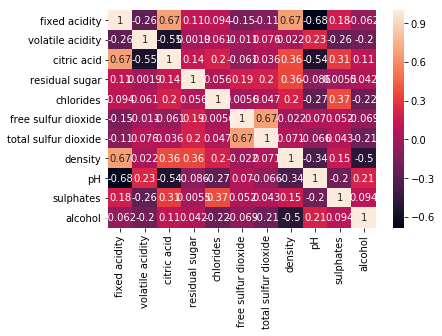

In [7]:
sns.heatmap(dfwine.drop('quality',axis=1).corr(),annot=True)

In [12]:
corr = dfwine.drop('quality',axis=1).corr().abs()
up_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

In [13]:
up_tri

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,NaN,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668
volatile acidity,NaN,NaN,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288
citric acid,NaN,NaN,NaN,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903
residual sugar,NaN,NaN,NaN,NaN,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075
chlorides,NaN,NaN,NaN,NaN,NaN,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141
free sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,0.667666,0.021946,0.070377,0.051658,0.069408
total sulfur dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.071269,0.066495,0.042947,0.205654
density,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341699,0.148506,0.496180
pH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.196648,0.205633
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093595


In [25]:
correlated_features = [ cols for cols in up_tri.columns if any(up_tri[cols] > 0.65)]

In [26]:
correlated_features

['citric acid', 'total sulfur dioxide', 'density', 'pH']

#### As expected acidity and pH has a high correlation compared to residual sugar and acidity

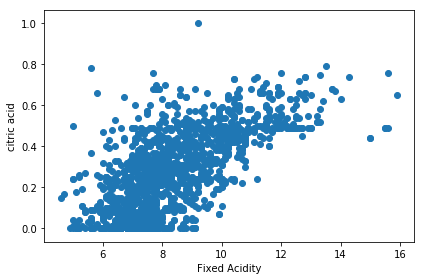

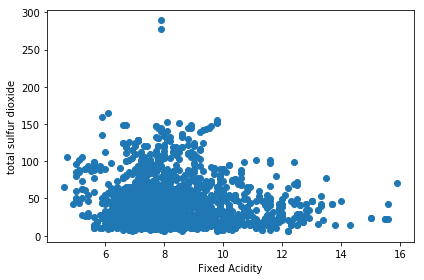

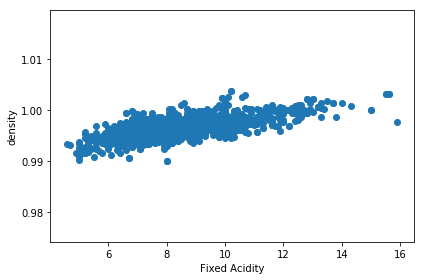

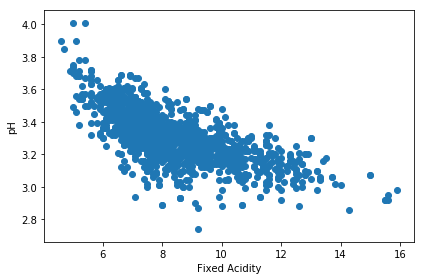

In [30]:
for i in range(len(correlated_features)):
    #plt.subplot(1,4,i)
    plt.scatter(dfwine['fixed acidity'],dfwine[correlated_features[i]])
    plt.xlabel('Fixed Acidity')
    plt.ylabel(correlated_features[i])
    plt.tight_layout()
    plt.show()

# Feature Importance using SelectKBest module

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
imp_features = SelectKBest(score_func=chi2)#default k =10 ,10 important predictors
imp_features.fit(dfwine.drop('quality',axis=1),dfwine['quality'])
all_features = imp_features.transform(dfwine.drop('quality',axis=1))

In [38]:
feature_names = dfwine.drop('quality',axis=1).columns[imp_features.get_support(indices=True)].tolist()

In [39]:
feature_names

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol']

# separate features and labels from the data-set at first.

In [40]:
X=dfwine.drop(['quality'],axis=1)
Y=dfwine['quality']

In [41]:
print(X.shape,Y.shape)

(1599, 11) (1599,)


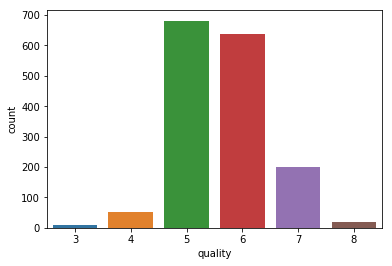

In [42]:
sns.countplot('quality',data=dfwine)

#### Imbalanced Dataset, the labels are no distributed uniformly

Label 5 and 6 are more prominent

# Train Test Split

In [45]:
#++++++++++++++++++++++++++++++++++++
#+ create train and test sets
#++++++++++++++++++++++++++++++++++++
# use stratify as I’ve mentioned before that the labels are imbalanced as most of the wine quality falls in the range 5,6
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=30, stratify=Y)


In [43]:
#++++++++++++++++++++++++++++++++
# create the pipeline object
#++++++++++++++++++++++++++++++++
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)


# Hyper-parameter Tuning

In [48]:
#++++++++++++++++++++++++++++++++++++++
#+ create the hyperparameter space
#++++++++++++++++++++++++++++++++++++++

parameteres = {'SVM__C':[0.001,0.1,10,100,10e5], 'SVM__gamma':[0.1,0.01]}
#++++++++++++++++++++++++++++++
#+ Grid Search Cross Validation
#++++++++++++++++++++++++++++++
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=10)

grid.fit(X_train, y_train)

print("score = %3.2f" %(grid.score(X_test,y_test)))


C:\Users\INTEL\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


score = 0.60


In [49]:
grid.best_params_

{'SVM__C': 100, 'SVM__gamma': 0.1}